In [1]:
from spectral import *
import spectral.io.envi as envi
import numpy as np
from PIL import Image
import os

import sys; sys.path.append("../../python")
from farmers import HyperspectralImage as hsi

IMAGE_MATRIX_FOLDER = "C:\\Users\\Alex\\HyperspectralPlantImaging"

In [3]:
files = filter((lambda x: x.endswith(".npy")), os.listdir(IMAGE_MATRIX_FOLDER))

files = map((lambda x : os.path.join(IMAGE_MATRIX_FOLDER, x)), files)

images = [np.load(file) for file in files]

In [12]:
# Returns how many background (black) pixels are in a chunk as a percentage from 0 to 1
def get_proportion_of_background_pixels_in_chunk(chunk):
    chunk = np.array(chunk)

    pixels = chunk.flatten()

    # How many pixels in the chunk have an intensity of 0?
    # (We will count them as background pixels)
    background_pixel_count = (pixels==0).sum()

    return background_pixel_count / len(pixels)

def slice_hsi_into_chunks(hyperspectral_image, chunk_size):

    chunks = []
    # Get the width and height for the image    
    image_size = np.array(list(hyperspectral_image.shape[:-1]))
    print(image_size)

    # Get how many chunks are needed for the image
    # as an array of integers
    image_chunks = np.ceil(image_size / chunk_size).astype(np.int64)

    for x in range(image_chunks[0]):
        for y in range(image_chunks[1]):

            # Get the pixels which should be covered by the chunk.
            chunk_start = np.array([x,y]) * chunk_size
            chunk_start = np.minimum(chunk_start, image_size)
            chunk_end = np.minimum(chunk_start + chunk_size, image_size)

            image_chunk = hyperspectral_image[chunk_start[0]:chunk_end[0], chunk_start[1]:chunk_end[1], :]

            chunks.append(image_chunk)
    
    return chunks

# Remove all chunks in a list of chunks where the percentage of background pixels are higher than a given percentage.
# E.g., remove_background_chunks_by_percentage(chunks, 0.8) will remove all chunks with 20% or more background pixels.
def remove_background_chunks_by_percentage(chunks, background_percentage):

    threshold = 1 - background_percentage

    filtered_chunks = filter((lambda x : get_proportion_of_background_pixels_in_chunk(x) <= threshold), chunks)
    return np.array(list(filtered_chunks))

for image in images:
    chunks = slice_hsi_into_chunks(image, 32)

    print(len(chunks))

    # Remove all chunks with more than 90% background content
    chunks = remove_background_chunks_by_percentage(chunks, 0.1)

    print(len(chunks))

[1088 2048]
2176
2176


c:\Users\Alex\anaconda3\envs\gpu_tf\lib\site-packages\spectral\graphics\spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)


ImageView object:
  Display bands       :  [0, 80.5, 160]
  Interpolation       :  <default>
  RGB data limits     :
    R: [-1.3193906545639038, 7.641409397125244]
    G: [0.0, 37.58002853393555]
    B: [0.0, 13.77069091796875]

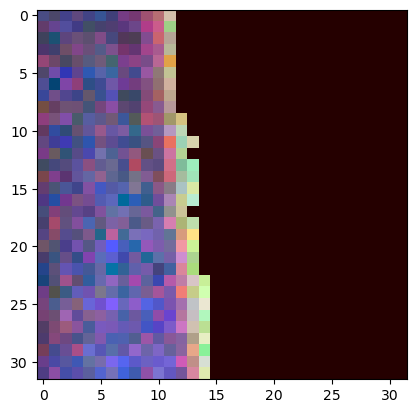

In [217]:
imshow(chunks[1])

In [219]:
for chunk in chunks:
    imshow(chunk)

c:\Users\Alex\anaconda3\envs\gpu_tf\lib\site-packages\spectral\graphics\spypylab.py:796: UserWarning: Failed to create RectangleSelector object. Interactive pixel class labeling will be unavailable.
  warnings.warn(msg)
c:\Users\Alex\anaconda3\envs\gpu_tf\lib\site-packages\spectral\graphics\spypylab.py:729: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(**kwargs)


KeyboardInterrupt: 